In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
X = dataset.iloc[:, [3,4]].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Using the Dendrogram to find the optimal number of clusters

In [6]:
import scipy.cluster.hierarchy as sch

In [7]:
Z = sch.linkage(X,method = 'single')

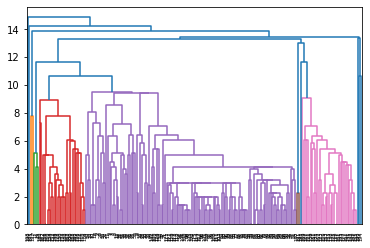

In [8]:
dendrogram = sch.dendrogram(Z)
plt.show()

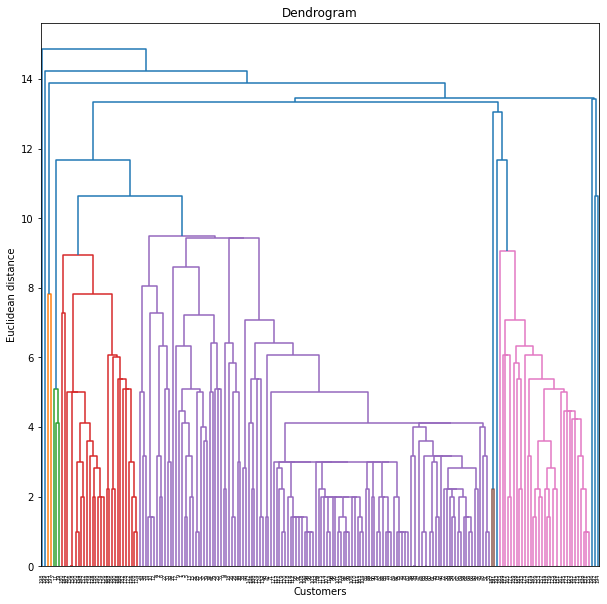

In [9]:
plt.figure(figsize = (10, 10))
dendogram = sch.dendrogram(Z)
plt.xlabel('Customers')
plt.xticks(rotation = 90)
plt.ylabel('Euclidean distance')
plt.title('Dendrogram')
plt.show()

## Complete Link

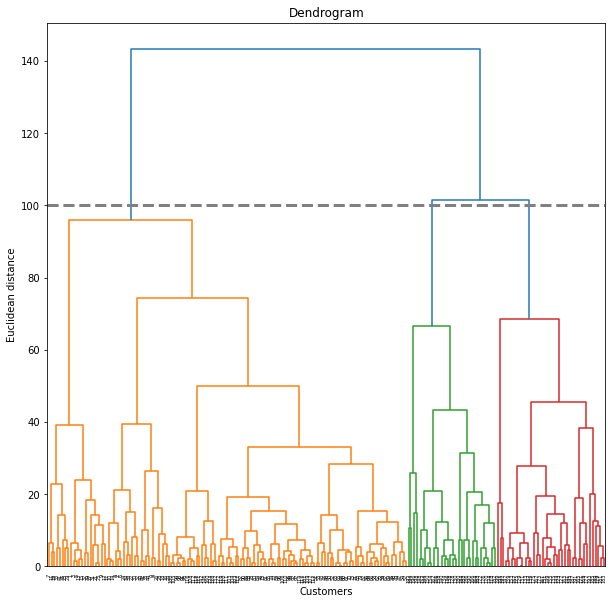

In [10]:
plt.figure(figsize = (10, 10))
dendogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.axhline(y = 100, c = 'grey', lw = 3, linestyle = 'dashed')
plt.xlabel('Customers')
plt.xticks(rotation = 90)
plt.ylabel('Euclidean distance')
plt.title('Dendrogram')
plt.show()

## Average Link

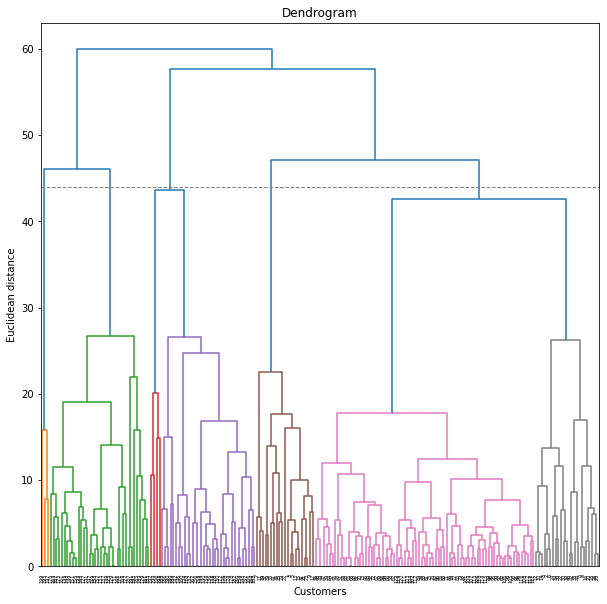

In [11]:
plt.figure(figsize = (10, 10))
dendogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.axhline(y = 44, c = 'grey', lw = 1, linestyle = 'dashed')
plt.xlabel('Customers')
plt.xticks(rotation = 90)
plt.ylabel('Euclidean distance')
plt.title('Dendrogram')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
# instence
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

In [14]:
#predicting clusters labels
y_hc = hc.fit_predict(X)

In [15]:
# labels of the clusters
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

## Visualizing the Clusters

In [16]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
dataset['Cluster labels'] = y_hc

In [18]:
dataset.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster labels
44,45,Female,49,39,28,0
130,131,Male,47,71,9,2
97,98,Female,27,60,50,0
187,188,Male,28,101,68,1
19,20,Female,35,23,98,0
172,173,Male,36,87,10,2
87,88,Female,22,57,55,0
41,42,Male,24,38,92,0
32,33,Male,53,33,4,0
6,7,Female,35,18,6,0


In [19]:
df0 = dataset[dataset['Cluster labels']==0]
df0

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster labels
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
126,127,Male,43,71,35,0
132,133,Female,25,72,34,0
142,143,Female,28,76,40,0
146,147,Male,48,77,36,0


In [20]:
df1 = dataset[dataset['Cluster labels']==1]
df1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster labels
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
127,128,Male,40,71,95,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1
133,134,Female,31,72,71,1
135,136,Female,29,73,88,1
137,138,Male,32,73,73,1
139,140,Female,35,74,72,1
141,142,Male,32,75,93,1


In [21]:
df2 = dataset[dataset['Cluster labels']==2]
df2

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster labels
128,129,Male,59,71,11,2
130,131,Male,47,71,9,2
134,135,Male,20,73,5,2
136,137,Female,44,73,7,2
138,139,Male,19,74,10,2
140,141,Female,57,75,5,2
144,145,Male,25,77,12,2
148,149,Female,34,78,22,2
150,151,Male,43,78,17,2
152,153,Female,44,78,20,2


## Examining the Clusters

In [22]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 160
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              129 non-null    int64 
 1   Genre                   129 non-null    object
 2   Age                     129 non-null    int64 
 3   Annual Income (k$)      129 non-null    int64 
 4   Spending Score (1-100)  129 non-null    int64 
 5   Cluster labels          129 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.1+ KB


In [23]:
df0.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster labels
count,129.000000,129.000000,129.000000,129.000000,129.0
mean,65.596899,40.178295,45.550388,49.131783,0.0
std,38.549384,15.976765,16.909669,19.499351,0.0
min,1.000000,18.000000,15.000000,3.000000,0.0
25%,33.000000,25.000000,33.000000,41.000000,0.0
50%,65.000000,38.000000,48.000000,49.000000,0.0
75%,97.000000,51.000000,60.000000,58.000000,0.0
max,161.000000,70.000000,79.000000,99.000000,0.0


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 123 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              39 non-null     int64 
 1   Genre                   39 non-null     object
 2   Age                     39 non-null     int64 
 3   Annual Income (k$)      39 non-null     int64 
 4   Spending Score (1-100)  39 non-null     int64 
 5   Cluster labels          39 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


In [25]:
df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster labels
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,162.000000,32.692308,86.538462,82.128205,1.0
std,22.803509,3.728650,16.312485,9.364489,0.0
min,124.000000,27.000000,69.000000,63.000000,1.0
25%,143.000000,30.000000,75.500000,74.500000,1.0
50%,162.000000,32.000000,79.000000,83.000000,1.0
75%,181.000000,35.500000,95.000000,90.000000,1.0
max,200.000000,40.000000,137.000000,97.000000,1.0


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 128 to 198
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              32 non-null     int64 
 1   Genre                   32 non-null     object
 2   Age                     32 non-null     int64 
 3   Annual Income (k$)      32 non-null     int64 
 4   Spending Score (1-100)  32 non-null     int64 
 5   Cluster labels          32 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [27]:
df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster labels
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,162.000000,32.692308,86.538462,82.128205,1.0
std,22.803509,3.728650,16.312485,9.364489,0.0
min,124.000000,27.000000,69.000000,63.000000,1.0
25%,143.000000,30.000000,75.500000,74.500000,1.0
50%,162.000000,32.000000,79.000000,83.000000,1.0
75%,181.000000,35.500000,95.000000,90.000000,1.0
max,200.000000,40.000000,137.000000,97.000000,1.0


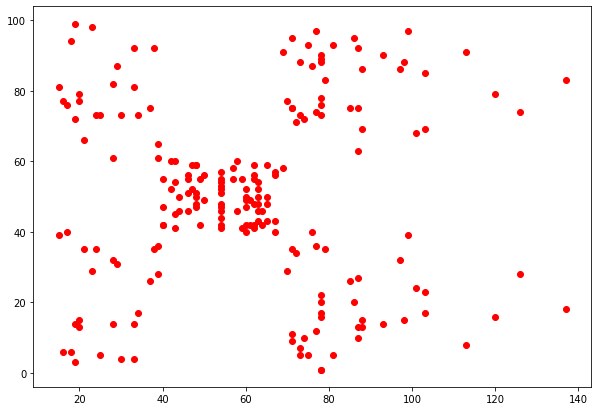

In [44]:
plt.figure(figsize = (10, 7))
plt.scatter(X[:, 0], X[:, 1], c = 'red', cmap = 'rainbow')
plt.show()

In [47]:
#sns.scatterplot(data = df, x = 'area', y = 'price')
#plt.show()

SyntaxError: invalid syntax (2843543716.py, line 1)

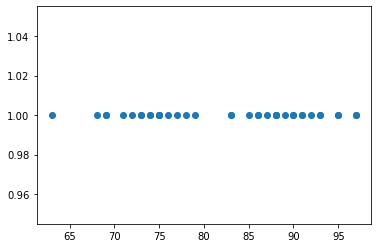

In [61]:
plt.scatter(data = df1, x = 'Spending Score (1-100)', y = 'Cluster labels')
plt.show()

ValueError: x and y must be the same size

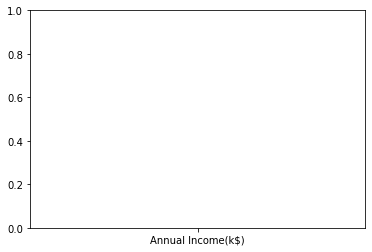

In [59]:
plt.scatter(data = df2, x = 'Annual Income(k$)', y = 'Spending Score (1-100)')
plt.show()

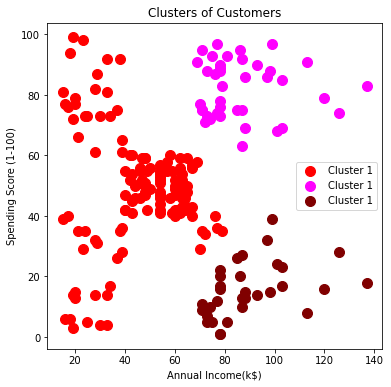

In [56]:
plt.figure(figsize = (6,6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'maroon', label = 'Cluster 1')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()